<a href="https://colab.research.google.com/github/eaa-msda/AI_Assisted_Generated_Data_Analytics-Templates/blob/main/DS_ML_Exploration_Template_EAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Errol Ian Ave Acosta
Data Science | Machine Learning
March 15, 2025
"""


In [9]:
# get the dataset
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving riskstudents.csv to riskstudents (1).csv
User uploaded file "riskstudents (1).csv" with length 911522 bytes


In [10]:
# Install and Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [17]:
# 1. Basic Data Exploration
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- First Few Rows ---")
print(df.head())

print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6203 entries, 0 to 6202
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   6203 non-null   object 
 1   Excel Program?           6203 non-null   object 
 2   English Speaking         6203 non-null   object 
 3   Parental Marital Status  6203 non-null   object 
 4   Type of High School      6203 non-null   object 
 5   Other Scholarships       6203 non-null   object 
 6   Student Cost             6203 non-null   int64  
 7   Student GPA              6203 non-null   float64
 8   AP Tests Passed          6203 non-null   int64  
 9   Athlete                  6203 non-null   object 
 10  Class Size               6203 non-null   object 
 11  Class Rank               6203 non-null   object 
 12  Student Health           6203 non-null   object 
 13  Class Hours              6203 non-null   int64  
 14  Ov

In [18]:
# 2. Check Data Types and Separate Features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

print("\n--- Categorical Columns ---")
print(categorical_cols)

print("\n--- Numerical Columns ---")
print(numerical_cols)


--- Categorical Columns ---
Index(['Gender', 'Excel Program?', 'English Speaking',
       'Parental Marital Status', 'Type of High School', 'Other Scholarships',
       'Athlete', 'Class Size', 'Class Rank', 'Student Health',
       'Change in GPA', 'Risk', 'County', 'State'],
      dtype='object')

--- Numerical Columns ---
Index(['Student Cost', 'Student GPA', 'AP Tests Passed', 'Class Hours',
       'Overall GPA', 'Absenses', 'Club Memberships', 'Infirmary Visits'],
      dtype='object')


In [27]:
# 3. Handling Duplicates & Missing Data
df.drop_duplicates(inplace=True)

# Impute missing values
num_imputer = SimpleImputer(strategy='median')  # Median for numerical
cat_imputer = SimpleImputer(strategy='most_frequent')  # Mode for categorical

df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


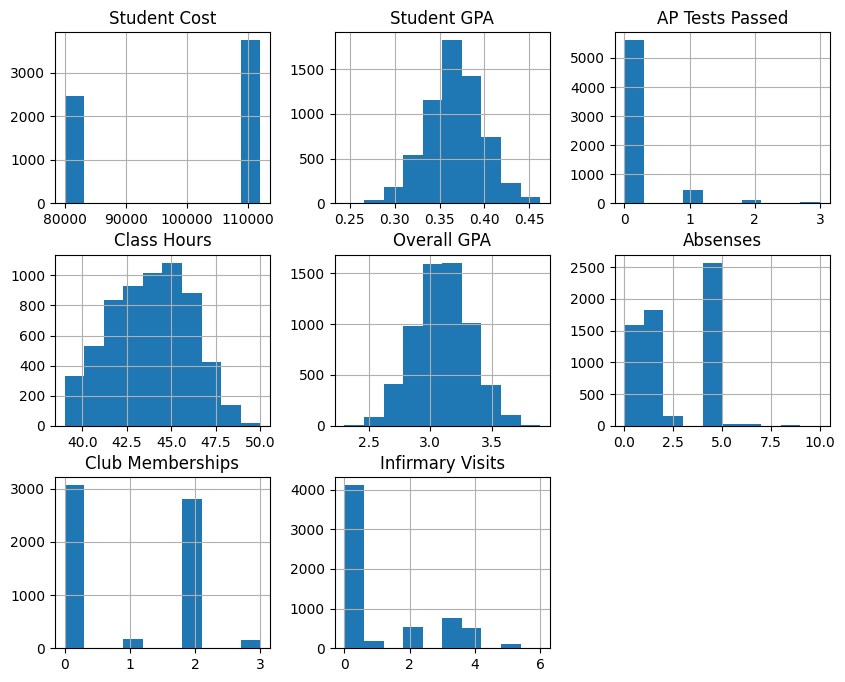

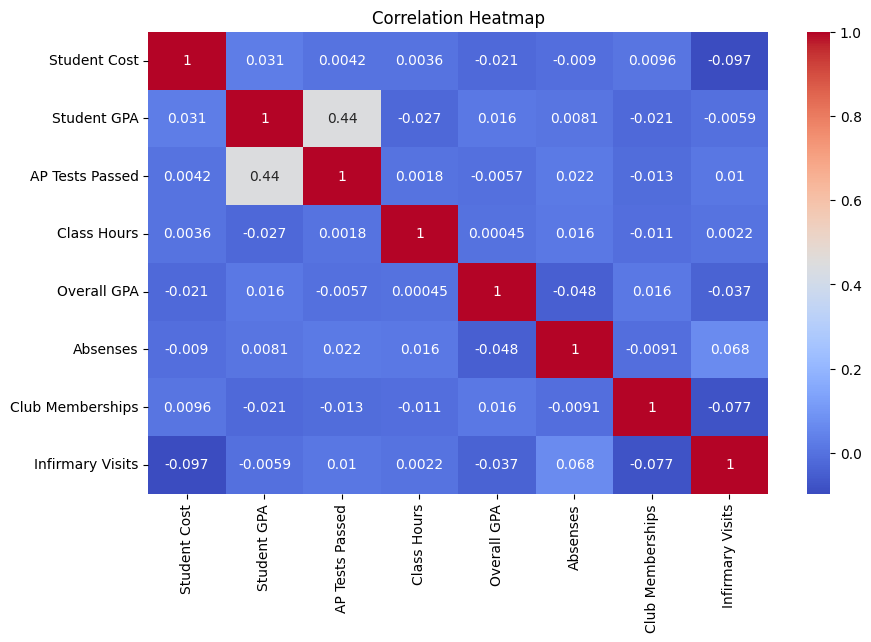

In [32]:
# 4. Check Data Distribution and Correlation
df.hist(figsize=(10, 8))
plt.show()

plt.figure(figsize=(10,6))
# Include numeric_only parameter to calculate correlation for numerical columns only.
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [34]:
# 5. Outlier Detection & Handling (Using IQR)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [37]:
# 6. Encode Categorical Variables
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore') # Changed 'sparse' to 'sparse_output'
df_encoded = pd.DataFrame(encoder.fit_transform(df_cleaned[categorical_cols]))

df_encoded.columns = encoder.get_feature_names_out(categorical_cols)
df_cleaned = df_cleaned.drop(columns=categorical_cols).reset_index(drop=True)
df_cleaned = pd.concat([df_cleaned, df_encoded], axis=1)

In [38]:
# 7. Feature Scaling (Standardization & Normalization)
scaler = StandardScaler()  # or MinMaxScaler() for normalization
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

In [40]:
# 8. Feature Selection (Removing Highly Correlated Features)
correlation_matrix = df_cleaned.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]

df_cleaned = df_cleaned.drop(columns=to_drop)

In [42]:
print(df.columns)  # To see the list of columns in original data (df)

Index(['Gender', 'Excel Program?', 'English Speaking',
       'Parental Marital Status', 'Type of High School', 'Other Scholarships',
       'Student Cost', 'Student GPA', 'AP Tests Passed', 'Athlete',
       'Class Size', 'Class Rank', 'Student Health', 'Class Hours',
       'Overall GPA', 'Change in GPA', 'Absenses', 'Club Memberships',
       'Infirmary Visits', 'Risk', 'County', 'State'],
      dtype='object')


In [46]:
# 9. Train-Test Split
target_column = 'Student GPA'  # Replace with the correct name
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# 10. Save Preprocessed Data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("\nData Preprocessing Completed. Train and test datasets saved.")


Data Preprocessing Completed. Train and test datasets saved.


Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [56]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=5)

In [63]:
import re # Import the 're' module for regular expressions

from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1)
# Get the current feature names from X_train
current_feature_names = X_train.columns.tolist()

# Replace any invalid characters with underscores
valid_feature_names = [re.sub(r'[\[\]<>]', '_', name) for name in current_feature_names]

# Set the feature names in the DMatrix
X_train.columns = valid_feature_names  # Update X_train columns
X_test.columns = valid_feature_names  # Make sure X_test matches

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=10)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


442/442 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8134
Epoch 2/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3507
Epoch 3/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3241
Epoch 4/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2966
Epoch 5/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2907
Epoch 6/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2687
Epoch 7/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2684
Epoch 8/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2507
Epoch 9/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2525
Epoch 10/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2238
Epoch 11/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2192
Epoch 12/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2125
Epoch 13/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2000
Epoch 14/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1878
Epoch 15/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1714
